In [4]:
import numpy as np
import pandas as pd
import time
import datetime

In [5]:
data = pd.read_csv('../data_processing/worldweatheronline.com/result_data.csv')

In [6]:
table0 = data[['date', 'time', 'tempC']]
table1 = data[['date', 'time', 'tempC']]

In [7]:
table0 = table0.loc[(table0['time'] == 1200)]

In [8]:
table0['date'] = pd.to_datetime(table0['date'])
table1['date'] = pd.to_datetime(table1['date'])
table0.set_index('date', inplace=True, drop=True)
table1.set_index('date', inplace=True, drop=True)

/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_29276/3471227955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['date'] = pd.to_datetime(table1['date'])


In [9]:
table1

,time,tempC
date,,
2009-04-01,0,0
2009-04-01,1200,2
2009-04-02,0,0
2009-04-02,1200,1
2009-04-03,0,-3
...,...,...
2022-03-16,0,-6
2022-03-16,1200,-4
2022-03-17,0,-7


In [77]:
table0 = table0['tempC']

In [10]:
df = data[['date', 'time', 'tempC', 'windspeedKmph', 'winddirdegree', 'weatherCode', 'humidity', 'pressureInches', 'pressureInches']]
df1 = data[['date', 'time', 'tempC', 'windspeedKmph', 'winddirdegree', 'weatherCode', 'humidity', 'pressureInches', 'pressureInches']]
#df.set_index('date', inplace=True, drop=False)
df = df.loc[(df['time'] == 1200)]
df['day'] = [time.strptime(n, "%Y-%m-%d").tm_mday for n in df['date']]
df['month'] = [time.strptime(n, "%Y-%m-%d").tm_mon for n in df['date']]
df['year'] = [time.strptime(n, "%Y-%m-%d").tm_year for n in df['date']]
df1['day'] = [time.strptime(n, "%Y-%m-%d").tm_mday for n in df1['date']]
df1['month'] = [time.strptime(n, "%Y-%m-%d").tm_mon for n in df1['date']]
df1['year'] = [time.strptime(n, "%Y-%m-%d").tm_year for n in df1['date']]
df1['status1'] = [1 if n >= 12 else 0 for n in df1['time']]
df1['status2'] = [1 if n == 0 else 0 for n in df1['time']]
df['status1'] = [1 if n >= 12 else 0 for n in df['time']]
df['status2'] = [1 if n == 0 else 0 for n in df['time']]
df['date'] = pd.to_datetime(df['date'])
df1['date'] = pd.to_datetime(df1['date'])
# print(df)
df['next_day_tempC'] = df.tempC.shift(-1)
df1['next_day_tempC'] = df1.tempC.shift(-1)
df.dropna(inplace=True)
df1.dropna(inplace=True)

X1_train =  df.drop(['date', 'time', 'next_day_tempC'], axis='columns')[0:df.shape[0]-473]
X1_test = df.drop(['date', 'time', 'next_day_tempC'], axis='columns')[df.shape[0]-473:]
y1_train = df[['next_day_tempC']][0:df.shape[0]-473]
y1_test = df[['next_day_tempC']][df.shape[0]-473:]
X11_train =  df1.drop(['date', 'time', 'next_day_tempC'], axis='columns')[0:df1.shape[0]-473]
X11_test = df1.drop(['date', 'time', 'next_day_tempC'], axis='columns')[df1.shape[0]-473:]
y11_train = df1[['next_day_tempC']][0:df.shape[0]-473]
y11_test = df1[['next_day_tempC']][df.shape[0]-473:]
#print(df.drop([''], axis='columns'))
X1_train

/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_29276/96759889.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = [time.strptime(n, "%Y-%m-%d").tm_mday for n in df1['date']]
/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_29276/96759889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = [time.strptime(n, "%Y-%m-%d").tm_mon for n in df1['date']]
/var/folders/yc/jct8g08s4pdfb9kr_t5r7m8r0000gq/T/ipykernel_29276/96759889.py:10: SettingWithCopyWarning: 
A value

,tempC,windspeedKmph,winddirdegree,weatherCode,humidity,pressureInches,pressureInches,day,month,year,status1,status2
1,2,9,191,266,100.0,30.0,30.0,1,4,2009,1,0
3,1,13,308,338,99.0,30.0,30.0,2,4,2009,1,0
5,1,12,221,338,98.0,30.0,30.0,3,4,2009,1,0
7,0,13,340,119,92.0,30.0,30.0,4,4,2009,1,0
9,2,5,190,122,98.0,30.0,30.0,5,4,2009,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8511,1,10,255,338,99.0,30.0,30.0,24,11,2020,1,0
8513,1,10,297,371,90.0,30.0,30.0,25,11,2020,1,0
8515,0,13,182,176,94.0,30.0,30.0,26,11,2020,1,0
8517,1,12,215,122,91.0,30.0,30.0,27,11,2020,1,0


In [11]:
df.shape

(4733, 15)

In [12]:
df1.shape

(9468, 15)

In [13]:
X1_train.values

array([[2.000e+00, 9.000e+00, 1.910e+02, ..., 2.009e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.300e+01, 3.080e+02, ..., 2.009e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.200e+01, 2.210e+02, ..., 2.009e+03, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.300e+01, 1.820e+02, ..., 2.020e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.200e+01, 2.150e+02, ..., 2.020e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 9.000e+00, 1.350e+02, ..., 2.020e+03, 1.000e+00,
        0.000e+00]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def visio(y1_train, y1_test, y_pred):

    plt.figure(figsize=(12,8))
    plt.plot(y1_train, label = 'Train')
    plt.plot(y1_test, label = 'Test')
    plt.plot(y_pred, label = 'Pred')
    plt.legend(loc='best')
    plt.savefig('graph.png')
    plt.show()
    

4.791200531912423


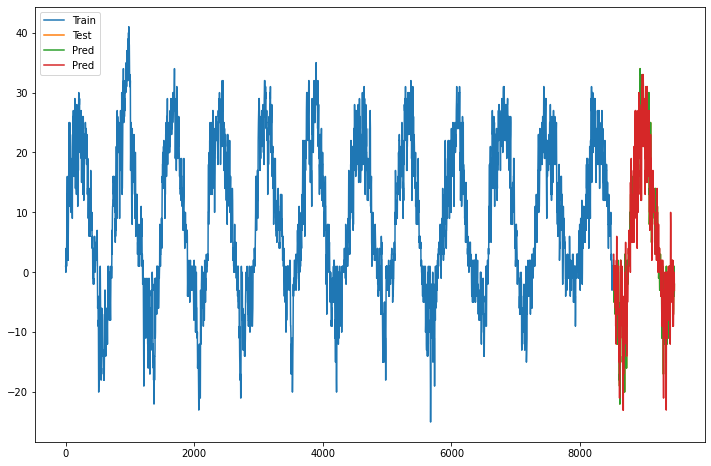

In [15]:
from sklearn import metrics, tree

clf = tree.DecisionTreeRegressor(random_state=1)
clf.fit(X1_train, y1_train)
reg_tree_pred = clf.predict(X1_test)
mse = (metrics.mean_squared_error(y1_test, reg_tree_pred, squared=False))
print(mse)

y_pred = pd.DataFrame.copy(y1_test)
y_pred['next_day_tempC'] = reg_tree_pred

visio(y1_train, y1_test, y_pred)

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3.217583537093144 - mse;


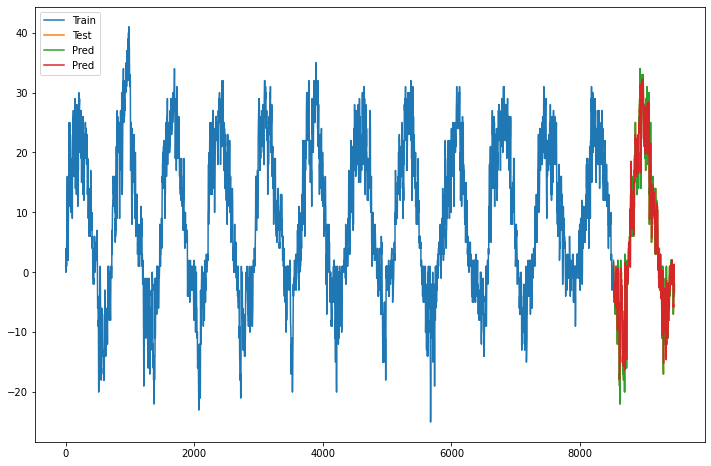

,next_day_tempC,tempC
8521,1.0,1.585717
8523,0.0,0.466736
8525,-1.0,-0.152528
8527,-5.0,-1.246942
8529,-5.0,-3.821371
...,...,...
9457,1.0,-0.446314
9459,1.0,0.156683
9461,0.0,1.345052
9463,-4.0,-0.708862


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt

boost_clf = GradientBoostingRegressor(random_state=0)
boost_clf.fit(X1_train, y1_train)
boost_pred = boost_clf.predict(X1_test)

rmse = metrics.mean_squared_error(y1_test, boost_pred, squared=False)
print(rmse,'- mse;')

y_pred = pd.DataFrame.copy(y1_test)
y_pred['tempC'] = boost_pred

visio(y1_train, y1_test, y_pred)
y_pred

In [169]:
import joblib

joblib.dump(boost_clf, 'method.pkl')

['method.pkl']

In [170]:
_joblib = joblib.load('method.pkl')

In [188]:
round(float(_joblib.predict([[14, 9,	191,	266,	100.0,	30.0,	30.0,	22,	5,	2022, 1, 0]])), 2)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


15.02

### Получаем метрики качества для модели на марковских цепях 

3.9559546467343414


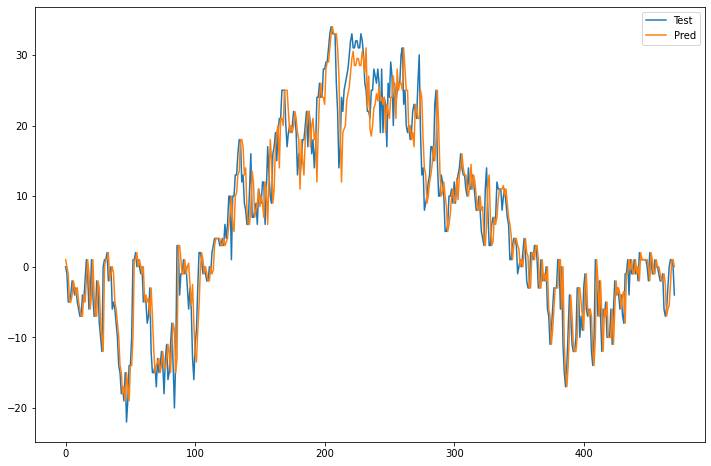

In [113]:
import numpy as np
import math
temp_matrix = np.load(open("../data_processing/matrices/matrix2.npy","rb"))


def temp_diff(data):
    result = np.array([])
    night1 = data[:4]
    day1 = data[4:8]
    night2 = data[8:12]
    day2 = data[12:]
    t1 = night2.mean()
    t2 = day2.mean()
    res1 = comp(night2 - night1)
    res2 = comp(day2 - day1)
    return res1, res2, t1, t2

def comp(temp):
    result = np.zeros(5)
    i = temp
    if i < -5:
        result[0] += 1
    elif (i >= -5) and (i < -2):
        result[1] += 1
    elif (i >= -2) and (i <= 2):
        result[2] += 1
    elif (i > 2) and (i <= 5):
        result[3] += 1
    else:
        result[4] += 1
    return result / 4

def calculation2(now, vector, T):
    month = now
    if month == 1:
        result = vector @ T[0]
    elif month == 2:
        result = vector @ T[1]
    elif month == 3:
        result = vector @ T[2]
    elif month == 4:
        result = vector @ T[3]
    elif month == 5:
        result = vector @ T[4]
    elif month == 6:
        result = vector @ T[5]
    elif month == 7:
        result = vector @ T[6]
    elif month == 8:
        result = vector @ T[7]
    elif month == 9:
        result = vector @ T[8]
    elif month == 10:
        result = vector @ T[9]
    elif month == 11:
        result = vector @ T[10]
    elif month == 12:
        result = vector @ T[11]
    return result

x1_test_np = X1_test.to_numpy()
y_pred_pd = pd.DataFrame.copy(y1_test)

y_pred = []
mse = 0
pred = []
test = []
for i in range(1,len(x1_test_np) - 1):
    v = calculation2(x1_test_np[i][8], comp(x1_test_np[i][0]- x1_test_np[i-1][0]), temp_matrix)
    m = [-5, -2.5, 0, 3.5, 5]
    res = x1_test_np[i][0] + m[v.argmax()]
    pred.append(res)
    test.append(x1_test_np[i+1][0])
    mse += (x1_test_np[i+1][0] - res) ** 2
rmse = math.sqrt(mse / len(x1_test_np))
print(rmse)
plt.figure(figsize=(12,8))
plt.plot(test, label = 'Test')
plt.plot(pred, label = 'Pred')
plt.xlabel("day number")
plt.ylabel("temperature in degrees Celsius")
plt.legend(loc='best')
plt.show()

